___

<a><img src='hospital01.jpg'/></a>
___


## EDA - Data Analysis for Hospitals

The following example shows the use of tools of data analysis like Exploratory Data Analysis (EDA), data cleaning, and data wrangling, utilized to extract and evaluated important information from the data.

The data was generated by me, for this purpose, taking into account data related.

First, we will start off by loading the packages needed.

In [1]:
import pandas as pd
import datetime
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

We transform the three archives available in a CSV format to a DataFrame format through the use of the panda's package and check the 5 first rows of each DataSet.

In [2]:
general_= pd.read_csv('general.csv')
prenatal_= pd.read_csv('prenatal.csv')
sports_= pd.read_csv('sports.csv')

In [3]:
general_.head()

,Unnamed: 0,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,general,man,33,1.64,66,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,1,general,man,48,1.93,106,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,2,general,woman,23,1.54,63,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,3,general,man,27,1.94,103,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,4,general,woman,22,1.76,74,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN


In [4]:
prenatal_.head()

,Unnamed: 0,HOSPITAL,Sex,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,prenatal,NaN,27.0,1.63,74.0,28.0,pregnancy,t,t,t,NaN,f,0.0,3.0
1,1,prenatal,NaN,18.0,1.70,89.0,31.3,pregnancy,t,t,t,NaN,f,1.0,5.0
2,2,prenatal,NaN,34.0,1.65,67.0,24.9,pregnancy,t,t,t,NaN,f,1.0,5.0
3,3,prenatal,NaN,29.0,1.58,71.0,28.7,pregnancy,t,t,t,NaN,f,2.0,3.0
4,4,prenatal,NaN,33.0,1.51,57.0,25.3,pregnancy,t,t,t,NaN,f,1.0,7.0


In [5]:
sports_.head()

,Unnamed: 0,Hospital,Male/female,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,0,sports,female,20.0,5.871,150.0,21.3,sprain,NaN,f,NaN,t,f,NaN,NaN
1,1,sports,female,20.0,6.665,248.0,27.3,dislocation,NaN,f,NaN,f,t,NaN,NaN
2,2,sports,male,16.0,6.960,273.0,27.6,dislocation,NaN,f,NaN,f,t,NaN,NaN
3,3,sports,male,17.0,7.128,269.0,25.9,sprain,NaN,f,NaN,t,f,NaN,NaN
4,4,sports,male,19.0,5.993,209.0,28.4,dislocation,NaN,f,NaN,f,t,NaN,NaN


Once check that the DataFrames share the same information, we rename some columns, concatenate them in one DataSet and drop the unnamed column because don't present valuable importance.

In [6]:
prenatal_.rename(columns={'HOSPITAL':'hospital','Sex':'gender'},inplace=True)
sports_.rename(columns={'Hospital':'hospital','Male/female':'gender'},inplace=True)
general_total = pd.concat([general_,prenatal_,sports_],ignore_index=True)
general_total.drop(columns=['Unnamed: 0'],inplace=True)

We check again the first 5 rows, to see the changes.

In [7]:
general_total.head()

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,man,33.0,1.64,66.0,24.9,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
1,general,man,48.0,1.93,106.0,28.4,stomach,t,NaN,t,NaN,NaN,NaN,NaN
2,general,woman,23.0,1.54,63.0,26.8,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
3,general,man,27.0,1.94,103.0,27.5,stomach,t,NaN,t,NaN,NaN,NaN,NaN
4,general,woman,22.0,1.76,74.0,24.0,dislocation,NaN,NaN,NaN,NaN,f,NaN,NaN


The shape of the final DataFrame is 1006 rows and 14 columns, 20 random rows are shown with the command [sample].

In [8]:
general_total.shape

(1006, 14)

In [9]:
general_total.sample(n=20,random_state=30)

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
928,sports,male,22.0,5.961,183.0,25.2,sprain,NaN,f,NaN,t,f,NaN,NaN
926,sports,male,26.0,5.804,218.0,31.7,sprain,NaN,f,NaN,t,f,NaN,NaN
901,sports,female,23.0,5.894,199.0,28.0,sprain,NaN,f,NaN,t,f,NaN,NaN
87,general,man,54.0,1.720,78.0,26.4,stomach,f,NaN,t,NaN,NaN,NaN,NaN
884,sports,female,20.0,6.771,244.0,26.0,sprain,NaN,f,NaN,t,f,NaN,NaN
297,general,man,56.0,1.480,54.0,25.1,cold,f,NaN,NaN,NaN,NaN,NaN,NaN
112,general,man,77.0,1.690,77.0,27.1,heart,t,t,NaN,NaN,NaN,NaN,NaN
209,general,man,29.0,2.080,109.0,25.5,stomach,t,NaN,f,NaN,NaN,NaN,NaN
419,general,man,53.0,1.700,78.0,27.2,stomach,t,NaN,t,NaN,NaN,NaN,NaN
913,sports,female,22.0,6.435,250.0,29.5,sprain,NaN,f,NaN,t,f,NaN,NaN


Using the command replace and a dictionary, we rectified the labels of the column gender for only 2 types and see the results of the change.

In [10]:
rename_gen= {'man':'m','woman':'f','female':'f','male':'m'}
general_total['gender']= general_total['gender'].replace(rename_gen)

In [11]:
general_total.sample(n=20,random_state=30)

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
928,sports,m,22.0,5.961,183.0,25.2,sprain,NaN,f,NaN,t,f,NaN,NaN
926,sports,m,26.0,5.804,218.0,31.7,sprain,NaN,f,NaN,t,f,NaN,NaN
901,sports,f,23.0,5.894,199.0,28.0,sprain,NaN,f,NaN,t,f,NaN,NaN
87,general,m,54.0,1.720,78.0,26.4,stomach,f,NaN,t,NaN,NaN,NaN,NaN
884,sports,f,20.0,6.771,244.0,26.0,sprain,NaN,f,NaN,t,f,NaN,NaN
297,general,m,56.0,1.480,54.0,25.1,cold,f,NaN,NaN,NaN,NaN,NaN,NaN
112,general,m,77.0,1.690,77.0,27.1,heart,t,t,NaN,NaN,NaN,NaN,NaN
209,general,m,29.0,2.080,109.0,25.5,stomach,t,NaN,f,NaN,NaN,NaN,NaN
419,general,m,53.0,1.700,78.0,27.2,stomach,t,NaN,t,NaN,NaN,NaN,NaN
913,sports,f,22.0,6.435,250.0,29.5,sprain,NaN,f,NaN,t,f,NaN,NaN


Using the command [dropna], the parameter 'all' and the axis (0 for rows, 1 for columns), we can erase all the rows or columns when all their parameters are (NaN).

In [12]:
general_total.dropna(axis=0,how='all',inplace=True)

Observing the previous size of the DataFrame (1006,14), we can check that the operation erased 6 rows with missing values.

In [13]:
general_total.shape

(1000, 14)

Inspecting the data, we can note that exist missing values only in the column gender with the label prenatal, assuming that this label belongs to a woman, we fix this using the panda's tool [fillna] and see the results afterward.

In [14]:
general_total.sample(n=20,random_state=30)

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
929,sports,f,23.0,6.809,259.0,27.3,sprain,NaN,f,NaN,t,f,NaN,NaN
927,sports,m,21.0,6.052,172.0,22.9,sprain,NaN,f,NaN,t,f,NaN,NaN
516,prenatal,NaN,20.0,1.650,66.0,24.3,pregnancy,t,t,t,NaN,f,1.0,4.0
87,general,m,54.0,1.720,78.0,26.4,stomach,f,NaN,t,NaN,NaN,NaN,NaN
885,sports,f,16.0,5.915,188.0,26.3,sprain,NaN,f,NaN,t,f,NaN,NaN
463,prenatal,NaN,34.0,1.650,67.0,24.9,pregnancy,t,t,t,NaN,f,1.0,5.0
112,general,m,77.0,1.690,77.0,27.1,heart,t,t,NaN,NaN,NaN,NaN,NaN
297,general,m,56.0,1.480,54.0,25.1,cold,f,NaN,NaN,NaN,NaN,NaN,NaN
417,general,f,26.0,1.650,69.0,25.3,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
660,prenatal,NaN,38.0,1.590,70.0,27.6,pregnancy,t,t,t,NaN,f,1.0,4.0


In [15]:
general_total['gender']= general_total['gender'].fillna('f')

In [16]:
general_total.sample(n=20,random_state=30)

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
929,sports,f,23.0,6.809,259.0,27.3,sprain,NaN,f,NaN,t,f,NaN,NaN
927,sports,m,21.0,6.052,172.0,22.9,sprain,NaN,f,NaN,t,f,NaN,NaN
516,prenatal,f,20.0,1.650,66.0,24.3,pregnancy,t,t,t,NaN,f,1.0,4.0
87,general,m,54.0,1.720,78.0,26.4,stomach,f,NaN,t,NaN,NaN,NaN,NaN
885,sports,f,16.0,5.915,188.0,26.3,sprain,NaN,f,NaN,t,f,NaN,NaN
463,prenatal,f,34.0,1.650,67.0,24.9,pregnancy,t,t,t,NaN,f,1.0,5.0
112,general,m,77.0,1.690,77.0,27.1,heart,t,t,NaN,NaN,NaN,NaN,NaN
297,general,m,56.0,1.480,54.0,25.1,cold,f,NaN,NaN,NaN,NaN,NaN,NaN
417,general,f,26.0,1.650,69.0,25.3,cold,t,NaN,NaN,NaN,NaN,NaN,NaN
660,prenatal,f,38.0,1.590,70.0,27.6,pregnancy,t,t,t,NaN,f,1.0,4.0


We can use the tool [missingno] to visualize the missing data in each column, each space in the bar shows a missing value.

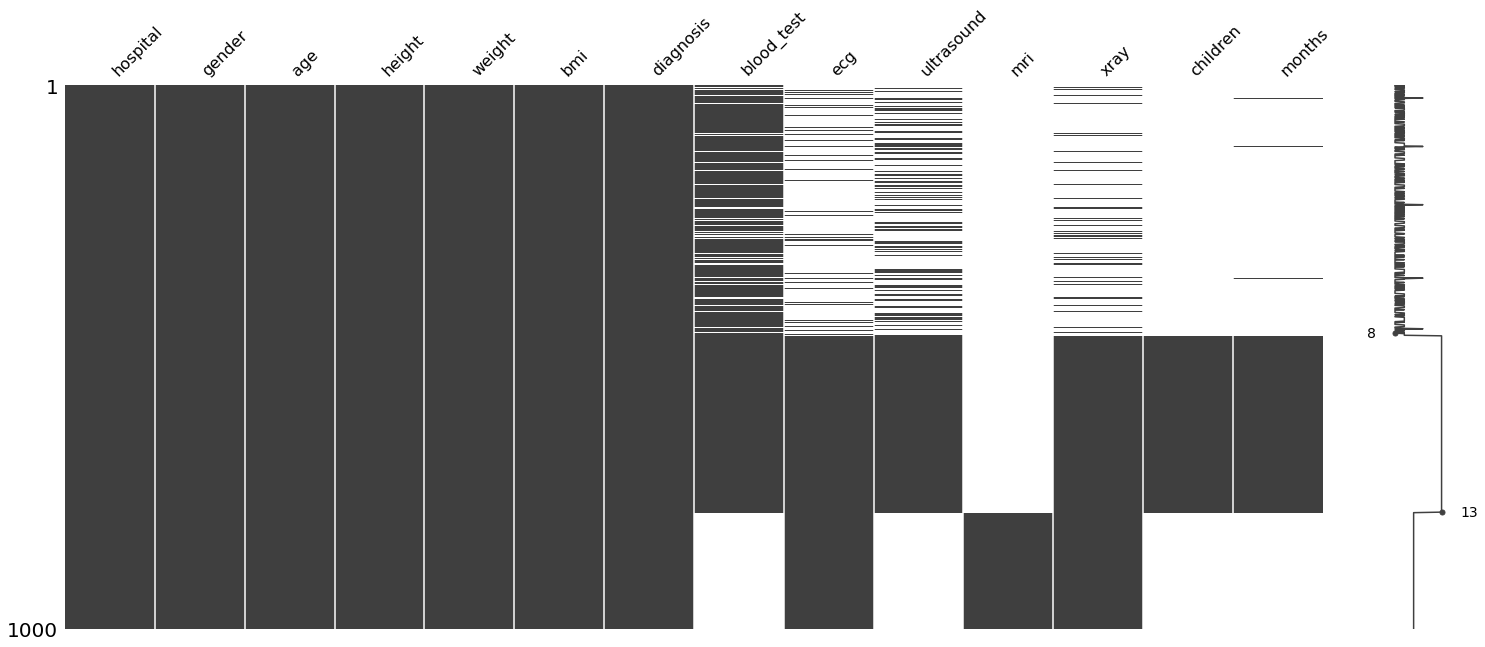

In [17]:
msno.matrix(general_total)
plt.show()

We can fill the missing values with the help of the command [fillna], in this case with the value of 0, and then check the data again.

In [18]:
general_total.fillna(0, inplace=True)

In [19]:
general_total.sample(n=20,random_state=30)

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
929,sports,f,23.0,6.809,259.0,27.3,sprain,0,f,0,t,f,0.0,0.0
927,sports,m,21.0,6.052,172.0,22.9,sprain,0,f,0,t,f,0.0,0.0
516,prenatal,f,20.0,1.650,66.0,24.3,pregnancy,t,t,t,0,f,1.0,4.0
87,general,m,54.0,1.720,78.0,26.4,stomach,f,0,t,0,0,0.0,0.0
885,sports,f,16.0,5.915,188.0,26.3,sprain,0,f,0,t,f,0.0,0.0
463,prenatal,f,34.0,1.650,67.0,24.9,pregnancy,t,t,t,0,f,1.0,5.0
112,general,m,77.0,1.690,77.0,27.1,heart,t,t,0,0,0,0.0,0.0
297,general,m,56.0,1.480,54.0,25.1,cold,f,0,0,0,0,0.0,0.0
417,general,f,26.0,1.650,69.0,25.3,cold,t,0,0,0,0,0.0,0.0
660,prenatal,f,38.0,1.590,70.0,27.6,pregnancy,t,t,t,0,f,1.0,4.0


Again we can check the missing data with the [missingno] tool.

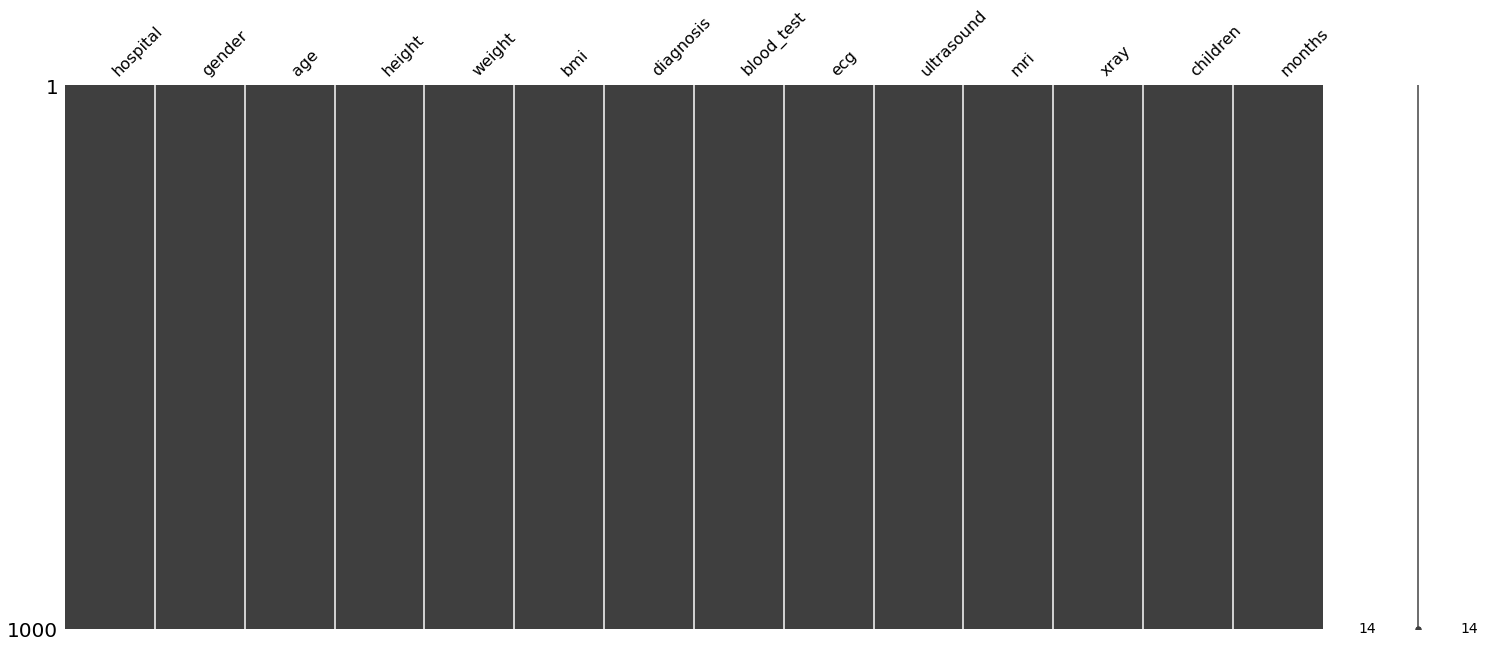

In [20]:
msno.matrix(general_total)
plt.show()

We can see that the data is uniformly in each column, now data is ready to work and look for some insights.

In [21]:
general_total

,hospital,gender,age,height,weight,bmi,diagnosis,blood_test,ecg,ultrasound,mri,xray,children,months
0,general,m,33.0,1.640,66.0,24.9,cold,t,0,0,0,0,0.0,0.0
1,general,m,48.0,1.930,106.0,28.4,stomach,t,0,t,0,0,0.0,0.0
2,general,f,23.0,1.540,63.0,26.8,cold,t,0,0,0,0,0.0,0.0
3,general,m,27.0,1.940,103.0,27.5,stomach,t,0,t,0,0,0.0,0.0
4,general,f,22.0,1.760,74.0,24.0,dislocation,0,0,0,0,f,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,sports,m,22.0,6.777,259.0,27.6,fracture,0,f,0,f,t,0.0,0.0
1002,sports,m,20.0,5.400,142.0,23.9,sprain,0,f,0,t,f,0.0,0.0
1003,sports,m,17.0,6.089,203.0,26.8,stomach,0,f,0,f,f,0.0,0.0
1004,sports,f,16.0,6.176,225.0,28.8,fracture,0,f,0,f,t,0.0,0.0


We can check now, the type of hospital with the most occurrence, a general count for the diagnosis type, and the correlation between hospital columns.

In [22]:
general_total.hospital.mode()[0]

'general'

In [23]:
general_total["diagnosis"].value_counts()

pregnancy      318
cold           194
stomach        157
sprain         104
dislocation     86
fracture        85
heart           56
Name: diagnosis, dtype: int64

In [24]:
general_total.corr()

,age,height,weight,bmi,children,months
age,1.000000,-0.467150,-0.431986,0.010133,-0.063045,-0.095473
height,-0.467150,1.000000,0.962309,0.023508,-0.255622,-0.328940
weight,-0.431986,0.962309,1.000000,0.186977,-0.250598,-0.321715
bmi,0.010133,0.023508,0.186977,1.000000,-0.015175,0.004368
children,-0.063045,-0.255622,-0.250598,-0.015175,1.000000,0.597973
months,-0.095473,-0.328940,-0.321715,0.004368,0.597973,1.000000


The operations show that hospital type [general] presents the most occurrence, the diagnosis top 1 occurrence is labeled to [pregnancy], finally we can conclude that the greater positive correlations are between [heigh-weight] and [children-months].

Following are some questions, that at this point, can be answered by the dataset.
1. What is the percentage of patients, whose diagnosis is 'stomach', with respect to the total of diagnoses in the hospital general?
2. What is the percentage of patients, whose diagnosis is 'dislocation', with respect to the total of diagnoses in the sports hospital?
3. What is the difference between ages medians in the hospital general with respect to the sports hospital in years?
4. What is the type of hospital with the greatest number of occurrences where a blood test is equal to 't', and its total number of tests?

In [25]:
q1 = round((general_total.loc[general_total['hospital'] == 'general', 'diagnosis']).value_counts()['stomach'] / len(
    (general_total.loc[general_total['hospital'] == 'general', 'diagnosis'])), 3) * 100
print(f'The answer to the first question is {q1} %')

The answer to the first question is 32.5 %


In [26]:
q2 = round((general_total.loc[general_total['hospital'] == 'sports', 'diagnosis']).value_counts()['dislocation'] / len(
    (general_total.loc[general_total['hospital'] == 'sports', 'diagnosis'])), 3) 
print(f'The answer to the second question is {round(q2 *100,3)} %')

The answer to the second question is 28.5 %


In [27]:
q3 = int(general_total.loc[general_total['hospital'] == 'general', 'age'].median() - (
    general_total.loc[general_total['hospital'] == 'sports', 'age'].median()))
print(f'The answer to the third question is {q3} years')

The answer to the third question is 19 years


In [28]:
q4_1 = general_total.loc[general_total['blood_test'] == 't', 'hospital'].mode()[0]
q4_2 = general_total.loc[general_total['hospital'] == q4_1, 'blood_test'].count()
print(f'The answer to the fourth question is {q4_1}, with {q4_2} blood tests')

The answer to the fourth question is prenatal, with 325 blood tests


Finally, we can conclude with some questions that could be responded to with the help of visualization tools.
1. What is the greater range of age, present in the dataset?
2. What is the type of hospital with the greater occurrence?
3. Why the violinplot for the height, shows a very large discrepancy?

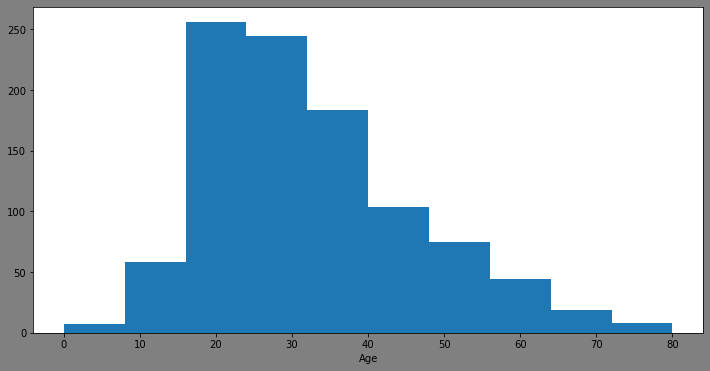

The answer to the 1st question: 15-35


In [29]:
plt.figure(figsize=(12,6),facecolor='gray')
plt.hist(general_total["age"], bins=10)
plt.xlabel('Age')
plt.show()
print('The answer to the 1st question: 15-35')

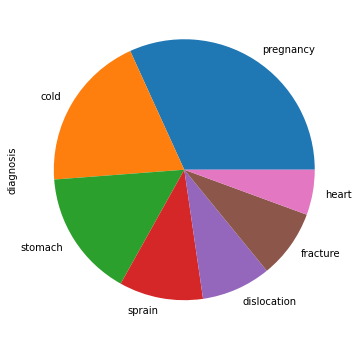

The answer to the 2nd question: pregnancy


In [30]:
plt.figure(figsize=(12,6),facecolor='white')
general_total.diagnosis.value_counts().plot(kind='pie')
plt.show()
print('The answer to the 2nd question: pregnancy')

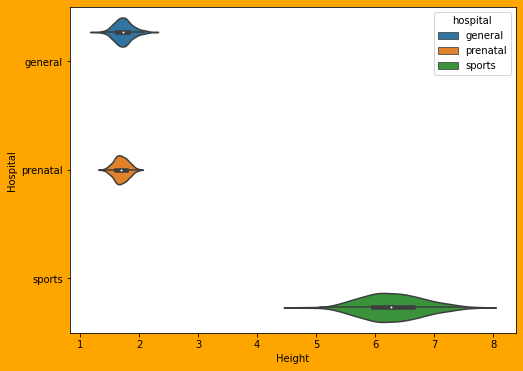

The answer to the 3rd question: it's because of the large values in the column.


In [31]:
plt.figure(figsize=(8,6),facecolor='orange')
sns.violinplot(x='height', y='hospital', data=general_total,showmeans=True, hue='hospital')
plt.xlabel('Height')
plt.ylabel('Hospital')
plt.show()
print("The answer to the 3rd question: it's because of the large values in the column.")

By Santiago A. Jiménez